# Title

## Introduction
Background: provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report

Question(s): clearly state the question you tried to answer with your project. Your question should involve one response variable of interest and one or more explanatory variables, and should be stated as a question. One common question format is: “Can [explanatory variable(s)] predict [response variable] in [dataset]?”, but you are free to format your question as you choose so long as it is clear.

Data Description: identify and fully describe the dataset that was used to answer the question. Provide a full descriptive summary of the dataset, including information such as the number of observations, summary statistics, number of variables, name and type of variables, what the variables mean, any issues you see in the data, any other potential issues related to things you cannot directly see, how the data were collected, etc. Make sure to use bullet point lists or tables to summarize the variables in an easy-to-understand format. Note that the selected dataset(s) will probably contain more variables than you need. 

Methods & Results:
describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.
your report should include code which:
loads data 
wrangles and cleans the data to the format necessary for the planned analysis
performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
Use our visualization best practices to make high-quality plots (make sure to include labels, titles, units of measurement, etc)
Explain any insights you gain from these plots that are relevant to address your question
performs the data analysis. For your analysis, you should think about and provide a brief explanation of the following questions:
Why is this method appropriate?
Which assumptions are required, if any, to apply the method selected?
What are the potential limitations or weaknesses of the method selected?
How did you compare and select the model?
Note: you should also think about the following:
How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?
creates a visualization of the analysis 
note: all figures should have a figure number and a legend

Discussion:
summarize what you found
discuss whether this is what you expected to find?
discuss what impact could such findings have?
discuss what future questions could this lead to?

## Introduction
Frank Wood and a research group in the computer science major conducted a project to analyze people's play time for online games. In this project, MineCraft was used to perform the research, and they recorded each player's actions. Through this data, I will be testing predictive questions. Can age and hours played predict the level of experience in the dataset? The dataset I will be using is the players.csv in the working directory. Within, there are 7 variables and 196 observations. Of the 7 columns, 4 of them are chr type: `experience`, `hashedEmail`, `name`, and `gender`. Another data type is dbl, which includes `played_hours` and `Age`. Lastly, `subscribe` is a lgl data type.

Description of columns in the dataset:

- `experience` - the level of experience of the player, which is pro, veteran, amateur, regular, and beginner.
- `hashedEmail` - the individual's email that has been altered into a non-human readable format 
- `name` - the first name of the player
- `gender` - the gender of the player
- `played_hours` - hours played for each player
- `Age` - the age
- `subscribe` - whether the player is part of the mailing list or not

Below, I have loaded the R package and the data below.

In [3]:
library(tidyverse)
library(repr)
library(dplyr)
library(rsample)
library(recipes)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘recipes’


The following object is masked from ‘package:stringr’:

    fixed


The following object is masked from ‘package:stats’:

    step


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ tune         1.1.2
✔ dials        1.3.0     ✔ workflows    1.1.4
✔ infer        1.0.7     ✔ workflowsets 1.0.1
✔ modeldata    1.4.0     ✔ yardstick    1.3.1
✔ parsnip      1.2.1     

── Conflicts ─────

In [4]:
players <- read_csv("players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


### Wrangling and Cleaning

In [5]:
minecraft <- players |>
    mutate(experience = as_factor(experience)) |> 
    select(experience, played_hours, Age)
minecraft

experience,played_hours,Age
<fct>,<dbl>,<dbl>
Pro,30.3,9
Veteran,3.8,17
Veteran,0.0,17
Amateur,0.7,21
Regular,0.1,21
Amateur,0.0,17
Regular,0.0,19
Amateur,0.0,21
Amateur,0.1,17


### Summary

In [15]:
aggregate <- minecraft |>
    summarise(average_age = mean(Age, na.rm = TRUE), oldest = max(Age, na.rm = TRUE), youngest = min(Age, na.rm = TRUE), average_play = mean(played_hours), highest = max(played_hours), lowest = min(played_hours))
aggregate

colSums(is.na(minecraft))

average_age,oldest,youngest,average_play,highest,lowest
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20.52062,50,8,5.845918,223.1,0


experience played_hours          Age 
           0            0            2

As one can see, the average age of the players is around 20 years old, 50 being the oldest and 8 being the youngest. As for the hours played, around 5.8 hours is the average time, and 223.1 is the highest, while 0 is the lowest. One problem with the dataset is that age has 2 values with NA. I will use the visualization from below to explain the problem in more detail. 

### Visulization

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


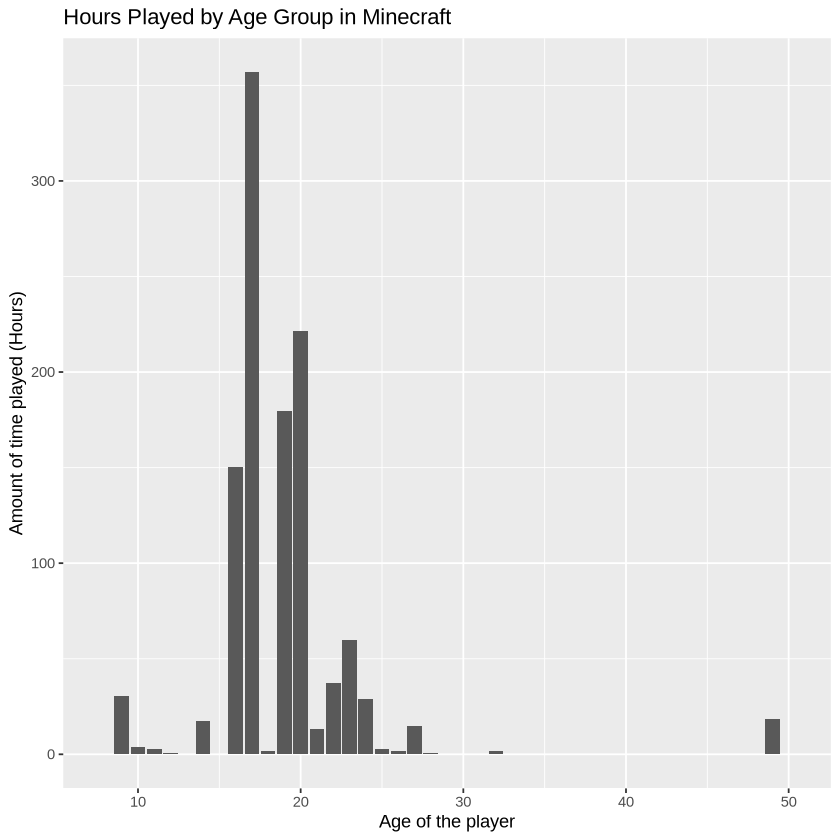

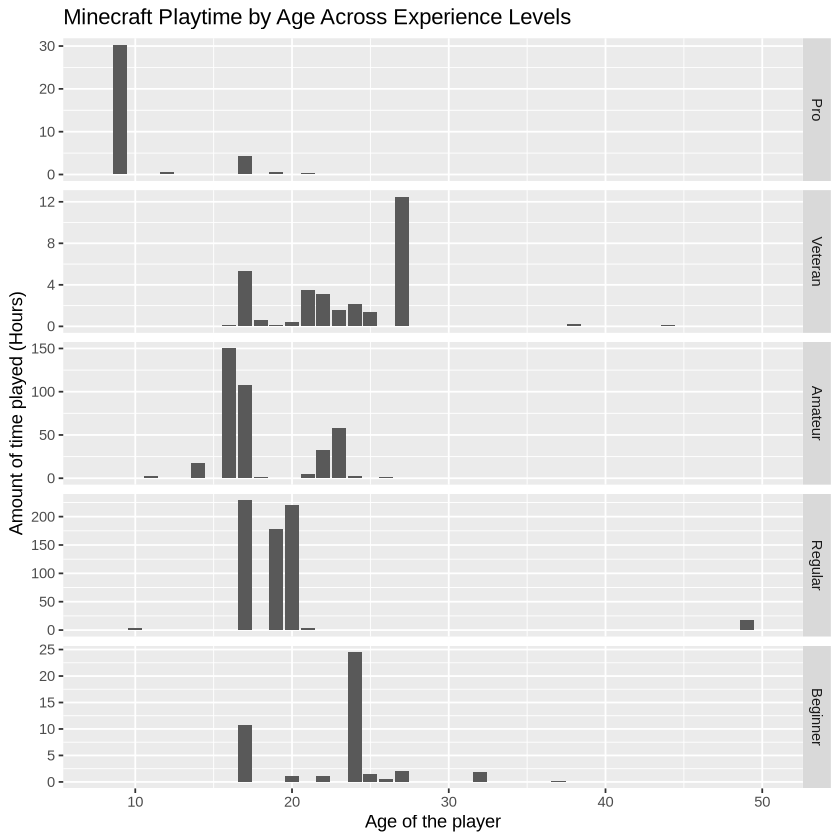

In [20]:
graph <- minecraft |>
    ggplot(aes(x = Age, y = played_hours)) +
    geom_bar(stat = "identity") +
    labs(title = "Hours Played by Age Group in Minecraft",x = "Age of the player", y = "Amount of time played (Hours)")
graph

group_graph <- minecraft |>
    ggplot(aes(x = Age, y = played_hours)) +
    geom_bar(stat = "identity") +
    facet_grid(rows = "experience", scales = "free_y") +
    labs(title = "Minecraft Playtime by Age Across Experience Levels",x = "Age of the player", y = "Amount of time played (Hours)")
group_graph

As one can see, there are not enough data points to cover 5 categories within the `experience` column. The pro group is especially low in data. As such, having even 2 missing values is significant. As such, when doing calassification, we will use `step_impute_mean()` to fill the NA.

## Methods and Results

In [94]:
set.seed(3)

minecraft_split <- initial_split(minecraft, prop = 0.75, strata = experience)
training_data <- training(minecraft_split)
testing_data <- testing(minecraft_split)

vfold <- vfold_cv(training_data, v = 3, strata = experience)

recipe <- recipe(experience ~., data = training_data) |>
    step_impute_mean(all_predictors()) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 2))

knn_results <- workflow() |>
    add_recipe(recipe) |>
    add_model(spec) |>
    tune_grid(resamples = vfold, grid = k_vals) |>
    collect_metrics()

best_k <- knn_results |>
    filter(.metric == "accuracy") |>
    arrange(desc(mean)) |>
    head(1) |>
    pull(neighbors)
best_k

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_fit <- workflow() |>
    add_recipe(recipe) |>
    add_model(knn_spec) |>
    fit(data = training_data)

prediction <- predict(knn_fit, testing_data) |>
    bind_cols(testing_data)

accuracy <- prediction |>
    metrics(truth = experience, estimate = .pred_class) |>
    filter(.metric == "accuracy")
accuracy

precision <- prediction |>
    precision(truth = experience, estimate = .pred_class, event_level = "first")
precision

recall <- prediction |>
    recall(truth = experience, estimate = .pred_class, event_level = "first")
recall

confusion <- prediction |>
    conf_mat(truth = experience, estimate = .pred_class)
confusion

[1] 39

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.3


Warning message:
“While computing multiclass `precision()`, some levels had no predicted events
(i.e. `true_positive + false_positive = 0`).
Precision is undefined in this case, and those levels will be removed from the
averaged result.
Note that the following number of true events actually occurred for each
problematic event level:
'Pro': 4, 'Regular': 9, 'Beginner': 10”


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,macro,0.2424242


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,macro,0.1931818


          Truth
Prediction Pro Veteran Amateur Regular Beginner
  Pro        0       0       0       0        0
  Veteran    1       1       2       2        0
  Amateur    3      10      14       7       10
  Regular    0       0       0       0        0
  Beginner   0       0       0       0        0